<a href="https://colab.research.google.com/github/doguma/RecomposeChopin/blob/main/02_Spectogram_BasicCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Import Data & Run CNN Model**
Hannah Do

May 6th, 2021



---


##### **Summary**

1. Conversion of **spectograms** to **3D Numpy Arrays** :



2. Splitting into train and test data


3. Basic CNN Model

4. Different types of CNN Model with Regularization


---

**Mount from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Get folder with segmented chopin spectograms**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

spectograms_path = "/content/gdrive/My Drive/Classics_DNN/chopin_spectograms/"
spectograms = os.listdir(spectograms_path)

print("No. of spectograms in the folder = ",len(spectograms))

No. of spectograms in the folder =  1575


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

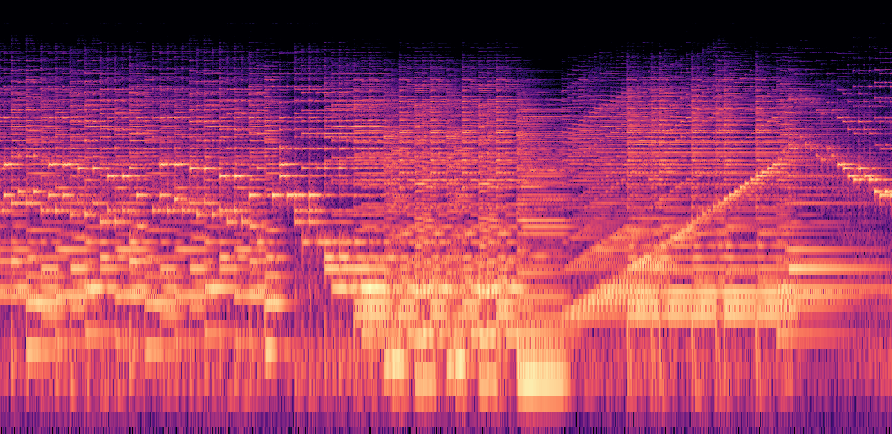

In [ ]:
# example spectogram image

img = load_img(spectograms_path + '490_chpn_op23.png')
img

In [ ]:
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, 0)

img_array.shape

(1, 434, 892, 3)

In [ ]:
# splitting the wav list into 4 segments due to Ram Crash

length = len(spectograms)
index = length//8

seg1 = spectograms[:index]
seg2 = spectograms[index:2*index]
seg3 = spectograms[2*index:3*index]
seg4 = spectograms[3*index:4*index]
seg5 = spectograms[4*index:5*index]
seg6 = spectograms[5*index:6*index]
seg7 = spectograms[6*index:7*index]
seg8 = spectograms[7*index:8*index]


In [ ]:
# function to combine images to 4d numpy arrays

def imgToNumpy(spect_list, spect_path, a):

  # random spectogram to begin with
  random_num = random.randint(0, length)
  img = load_img(spect_path + str(spectograms[random_num]))
  img = img_to_array(img)
  x = np.expand_dims(img, 0)

  for i in spect_list:
    img = load_img(spect_path + i)
    img_array2 = img_to_array(img)
    img_array2 = np.expand_dims(img_array2, 0)
    x = np.append(x, img_array2, axis=0)

  np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg" + str(a+1), x)
  print("Segment " + str(a+1) + " converted to 4D Numpy array \n")
  print("Shape : " + str(x.shape))


In [ ]:
# segmented to prevent Ram Crash

segments = [seg1, seg2, seg3, seg4, seg5, seg6, seg7, seg8]

a = 0
for i in segments:
  imgToNumpy(i, spectograms_path, a)
  a = a+1


Segment 1 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 2 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 3 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 4 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 5 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 6 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 7 converted to 4D Numpy array
Shape : (197, 434, 892, 3)
Segment 8 converted to 4D Numpy array
Shape : (197, 434, 892, 3)


In [ ]:
# nump1 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg1.npy")
# nump2 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg2.npy")
# nump3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg3.npy")
# nump4 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg4.npy")
# nump5 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg5.npy")
# nump6 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg6.npy")
nump7 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg7.npy")
nump8 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg8.npy")


In [ ]:
# freeing memory
nump1 = None
nump2 = None
nump3 = None
nump4 = None
nump5 = None
nump6 = None
nump7 = None
nump8 = None

In [ ]:
# Combine segments to make four parts numpy 4D array

# numpy1 = np.append(nump1, nump2, axis=0)
# np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/part1", numpy1)

# numpy2 = np.append(nump3, nump4, axis=0)
# np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/part2", numpy2)

# numpy3 = np.append(nump5, nump6, axis=0)
# np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/part3", numpy3)

numpy4 = np.append(nump7, nump8, axis=0)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/part4", numpy4)

numpy4.shape

(394, 434, 892, 3)

In [ ]:
# freeing memory
numpy1 = None
numpy2 = None
numpy3 = None
numpy4 = None

In [ ]:
# part1 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/part1.npy")
# part2 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/part2.npy")
part3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/part3.npy")
part4 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/part4.npy")


In [ ]:
# Combine segments to make two halves numpy 4D array

# half1 = np.append(part1, part2, axis=0)
# np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/half1", half1)

half2 = np.append(part3, part4, axis=0)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/half2", half2)


In [ ]:
half2.shape

(788, 434, 892, 3)

In [ ]:
# freeing memory
part1 = None
part2 = None
part3 = None
part4 = None

In [ ]:
# freeing memory
half1 = None
half2 = None

In [ ]:
# Set train and test data to 4:1 ratio

train_data = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/half1.npy")
test_data = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg5.npy")


In [ ]:
# Set train and test data to 1:1 ratio

train_data2 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg1.npy")
test_data2 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/seg2.npy")


In [ ]:
train_data.shape, test_data.shape

((788, 434, 892, 3), (197, 434, 892, 3))

In [ ]:
train_data2.shape, test_data2.shape

((197, 434, 892, 3), (197, 434, 892, 3))

In [ ]:
x_train = train_data[:, :200, :, :]
y_train = train_data[:, 200:400, :, :]

x_test = test_data[:, :200, :, :]
y_test = test_data[:, 200:400, :, :]

In [ ]:
x_train2 = train_data2[:, :50, :, :]
y_train2 = train_data2[:, 50:100, :, :]

x_test2 = test_data2[:, :50, :, :]
y_test2 = test_data2[:, 50:100, :, :]

In [ ]:
x_train3 = train_data[:, :400, :400, :]
y_train3 = train_data[:, :400, 400:800, :]

x_test3 = test_data[:, :400, :400, :]
y_test3 = test_data[:, :400, 400:800, :]

In [ ]:
train_data = None
test_data = None

In [ ]:
train_data2 = None
test_data2 = None

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((788, 200, 892, 3),
 (788, 200, 892, 3),
 (197, 200, 892, 3),
 (197, 200, 892, 3))

In [ ]:
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((788, 200, 892, 3), (788, 20, 892, 3), (197, 200, 892, 3), (197, 20, 892, 3))

In [ ]:
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

((788, 400, 400, 3),
 (788, 400, 400, 3),
 (197, 400, 400, 3),
 (197, 400, 400, 3))

In [ ]:
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train", x_train)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train", y_train)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test", x_test)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test", y_test)


In [ ]:
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train2", x_train2)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train2", y_train2)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test2", x_test2)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test2", y_test2)

In [ ]:
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train3", x_train3)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train3", y_train3)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test3", x_test3)
np.save("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test3", y_test3)

In [ ]:
x_train = None
y_train = None
x_test = None
y_test = None


In [ ]:
x_train2 = None
y_train2 = None
x_test2 = None
y_test2 = None

### **Implement Baseline model with ...**

In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=fb8454f2f1b4e9e2bba87a5028a3cf61aa129faa2879f53484a61f3cfd7a722b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=9edc9594e927391f0dc1390878bb8069ac94fbf9dc2a6e9648b4500dea7f369b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [ ]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, LeakyReLU
from keras.utils import np_utils

from keras import backend as K

In [ ]:

x_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train.npy")
y_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train.npy")
x_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test.npy")
y_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test.npy")


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((788, 200, 892, 3),
 (788, 200, 892, 3),
 (197, 200, 892, 3),
 (197, 200, 892, 3))

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## **First model**
Test data : 788 images with input shape (200, 892, 3)

Test data : 197 images with input shape (200, 892, 3)

- Very basic CNN basic model with minimum parameters


In [ ]:

model = Sequential()

model.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(200, 892, 3)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2DTranspose(1, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))

# output layer
model.add(Dense(3, activation='linear'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 200, 892, 1)       28        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 100, 446, 1)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 446, 1)       0         
_________________________________________________________________
conv2d_transpose_31 (Conv2DT (None, 200, 892, 1)       17        
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 200, 892, 1)       0         
_________________________________________________________________
dense_12 (Dense)             (None, 200, 892, 3)       6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________

In [ ]:
# compiling the sequential model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
25/25 [==============================] - 6s 200ms/step - loss: 23942.7505 - mae: 137.5740 - val_loss: 22196.9395 - val_mae: 134.2491
Epoch 2/10
25/25 [==============================] - 5s 189ms/step - loss: 23629.9377 - mae: 138.2214 - val_loss: 22017.9062 - val_mae: 134.0813
Epoch 3/10
25/25 [==============================] - 5s 185ms/step - loss: 23239.2538 - mae: 137.5946 - val_loss: 21835.6094 - val_mae: 133.9930
Epoch 4/10
25/25 [==============================] - 5s 185ms/step - loss: 23005.3529 - mae: 137.1542 - val_loss: 21523.0430 - val_mae: 133.8009
Epoch 5/10
25/25 [==============================] - 5s 187ms/step - loss: 22849.8966 - mae: 137.3638 - val_loss: 21007.8477 - val_mae: 133.2277
Epoch 6/10
25/25 [==============================] - 5s 187ms/step - loss: 21631.2992 - mae: 132.7828 - val_loss: 20364.0488 - val_mae: 131.9783
Epoch 7/10
25/25 [==============================] - 5s 184ms/step - loss: 21980.0918 - mae: 135.2889 - val_loss: 19722.9590 - val_mae: 1

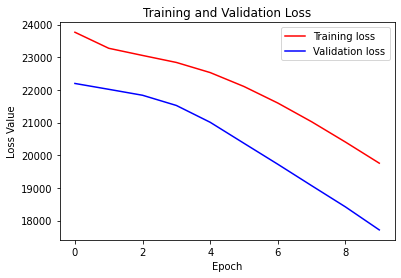

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Here we can see the **steady decrease in loss value** for both train and validation data - can run for more epochs with higher learning rate

In [ ]:
x_train3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train3.npy")
y_train3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train3.npy")
x_test3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test3.npy")
y_test3 = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test3.npy")


In [ ]:
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

((788, 400, 400, 3),
 (788, 400, 400, 3),
 (197, 400, 400, 3),
 (197, 400, 400, 3))

## **Second model**
Test data : 788 images with input shape (400, 400, 3)

Test data : 197 images with input shape (400, 400, 3)

- Slightly developed CNN model with more Convolution layers, LeakyRelu and additional nodes.


In [ ]:

model2 = Sequential()

model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(400, 400, 3)))

# convolutional layer
model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2DTranspose(5, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))
model2.add(Dropout(0.25))

model2.add(Dense(3, activation='linear'))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 400, 400, 5)       140       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 400, 400, 5)       230       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 200, 200, 5)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 200, 200, 5)       230       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 100, 100, 5)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 100, 100, 5)       230       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 50, 50, 5)       

In [ ]:
# compiling the sequential model
model2.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history2 = model2.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 11s 420ms/step - loss: 15501.8089 - mae: 98.9475 - val_loss: 9920.1621 - val_mae: 80.0136
Epoch 2/10
25/25 [==============================] - 10s 410ms/step - loss: 10996.5260 - mae: 82.2790 - val_loss: 7284.7041 - val_mae: 65.7497
Epoch 3/10
25/25 [==============================] - 10s 408ms/step - loss: 8202.1465 - mae: 67.4169 - val_loss: 3036.1272 - val_mae: 39.5872
Epoch 4/10
25/25 [==============================] - 10s 412ms/step - loss: 5063.6939 - mae: 51.0253 - val_loss: 2547.2893 - val_mae: 35.7855
Epoch 5/10
25/25 [==============================] - 10s 412ms/step - loss: 4570.4459 - mae: 48.1549 - val_loss: 2449.6995 - val_mae: 35.0628
Epoch 6/10
25/25 [==============================] - 10s 413ms/step - loss: 4367.9496 - mae: 47.2354 - val_loss: 2524.2500 - val_mae: 35.7972
Epoch 7/10
25/25 [==============================] - 10s 411ms/step - loss: 4260.3908 - mae: 46.5912 - val_loss: 2074.1619 - val_mae: 32.2666
Epoch 8/10


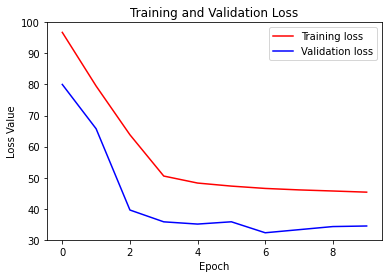

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss2 = history2.history['mae']
val_loss2 = history2.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([30, 100])
plt.legend()
plt.show()

- We can see the **validation loss reaching its minimum at epoch six**. Training loss may continue to steadily decrease, but the model training needs to stop early at epoch six for generalization trade-off.

## **Third model**
Test data : 788 images with input shape (400, 400, 3)

Test data : 197 images with input shape (400, 400, 3)

- Complex CNN model with more Conv layers, MaxPooling, LeakyRelu and additional nodes.

In [ ]:

model3 = Sequential()

model3.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(400, 400, 3)))

# convolutional layer
model3.add(Conv2D(35, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))

model3.add(Conv2DTranspose(75, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))

model3.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))
model3.add(Dropout(0.25))

# output layer
model3.add(Dense(3, activation='linear'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 400, 400, 25)      700       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 400, 400, 35)      7910      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 200, 200, 35)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 200, 200, 125)     39500     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 100, 100, 125)     0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 100, 100, 5)       5630      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 50, 50, 5)       

In [ ]:
# compiling the sequential model
model3.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history3= model3.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 8883.9285 - mae: 69.7675 - val_loss: 2031.8120 - val_mae: 32.7406
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 2793.9058 - mae: 38.6536 - val_loss: 1926.8600 - val_mae: 32.0347
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 2590.3262 - mae: 36.8981 - val_loss: 2042.5693 - val_mae: 33.0566
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 2567.2602 - mae: 36.6846 - val_loss: 1901.7072 - val_mae: 31.9877
Epoch 5/10
25/25 [==============================] - 36s 1s/step - loss: 2442.4722 - mae: 35.8136 - val_loss: 1812.7029 - val_mae: 31.3581
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 2289.7017 - mae: 34.7733 - val_loss: 1833.2859 - val_mae: 31.7062
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 2265.1343 - mae: 34.5010 - val_loss: 1648.5397 - val_mae: 28.8727
Epoch 8/10
25/25 [================

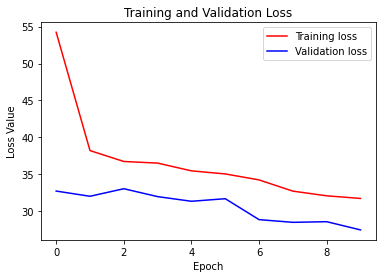

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss3 = history3.history['mae']
val_loss3 = history3.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss3, 'r', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Model three shows **the lowest error rate** compared to the previous models. The graph also shows possibility of improvement if more epochs are run.

## **Fourth model**
Test data : 788 images with input shape (400, 400, 3)

Test data : 197 images with input shape (400, 400, 3)

- Complex CNN model with more Conv layers, MaxPooling, LeakyRelu and additional nodes - Same model as Model Three
- Changed **learning rate of Adam optimizer to 0.1 & 0.05**

In [ ]:
import tensorflow as tf

In [ ]:

model4 = Sequential()

model4.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(400, 400, 3)))

# convolutional layer
model4.add(Conv2D(35, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Conv2DTranspose(75, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))
model4.add(Dropout(0.25))

# output layer
model4.add(Dense(3, activation='linear'))

model4.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 400, 400, 25)      700       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 400, 400, 35)      7910      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 200, 200, 35)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 200, 200, 125)     39500     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 100, 100, 125)     0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 100, 100, 5)       5630      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 50, 50, 5)       

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model4.compile(loss='mse', metrics=['mae'], optimizer=opt)

# training the model
history4 = model4.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 17410294063082.2266 - mae: 1144152.8589 - val_loss: 31708.4141 - val_mae: 142.8952
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 52047.9129 - mae: 179.4537 - val_loss: 45263.4102 - val_mae: 168.0824
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 66275.7447 - mae: 203.0670 - val_loss: 45997.6641 - val_mae: 169.6146
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 66491.9853 - mae: 203.7541 - val_loss: 45064.7305 - val_mae: 168.1775
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 64855.4316 - mae: 201.3384 - val_loss: 43887.3594 - val_mae: 166.3047
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 63063.0273 - mae: 198.9464 - val_loss: 42617.9844 - val_mae: 164.2561
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 60973.1056 - mae: 195.9133 - val_loss: 41291.2305 - val_mae: 16

In [ ]:

opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model4.compile(loss='mse', metrics=['mae'], optimizer=opt)

# training the model
history4 = model4.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 200243869536.3535 - mae: 111238.9880 - val_loss: 15046.6230 - val_mae: 100.8412
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 16222.8505 - mae: 105.0229 - val_loss: 15397.8350 - val_mae: 103.0372
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 16526.2719 - mae: 106.3226 - val_loss: 15275.7129 - val_mae: 102.1564
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 16627.2723 - mae: 106.3349 - val_loss: 15090.1436 - val_mae: 100.8404
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 16279.4271 - mae: 104.7442 - val_loss: 14936.8906 - val_mae: 99.7527
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 15884.6123 - mae: 102.4978 - val_loss: 14861.7871 - val_mae: 99.2979
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 15652.4796 - mae: 101.1886 - val_loss: 14820.8164 - val_mae: 99.1026

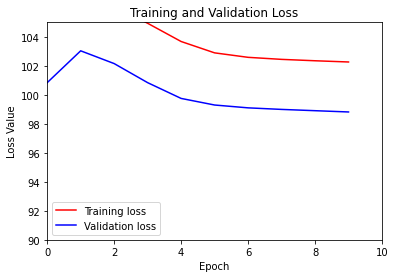

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss4, 'r', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([90, 105])
plt.xlim([0, 10])
plt.legend()
plt.show()

- It looks like default adam optimizer learning rate - smaller size than 0.1 or 0.05 - worked much better

### **Combined Train and Validation graphs** of All Previous Models

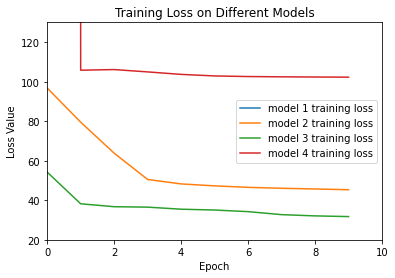

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, label='model 1 training loss')
plt.plot(epochs, train_loss2,  label='model 2 training loss')
plt.plot(epochs, train_loss3,  label='model 3 training loss')
plt.plot(epochs, train_loss4,  label='model 4 training loss')

plt.title('Training Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([20, 130])
plt.xlim([0, 10])
plt.legend()
plt.show()

- **Fastest convergence on Model 3** - and possibility of reaching smaller training loss value

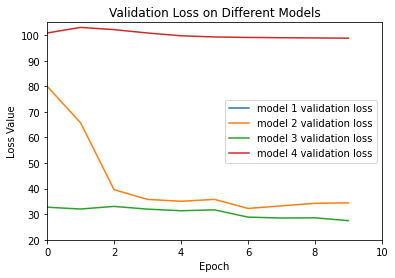

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, val_loss, label='model 1 validation loss')
plt.plot(epochs, val_loss2,  label='model 2 validation loss')
plt.plot(epochs, val_loss3,  label='model 3 validation loss')
plt.plot(epochs, val_loss4,  label='model 4 validation loss')

plt.title('Validation Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([20, 105])
plt.xlim([0, 10])
plt.legend()
plt.show()

- **Steady Decrease on Model 3** - and possibility of reaching smaller validation loss value